In [131]:
import numpy as np
import matplotlib.pyplot as plt


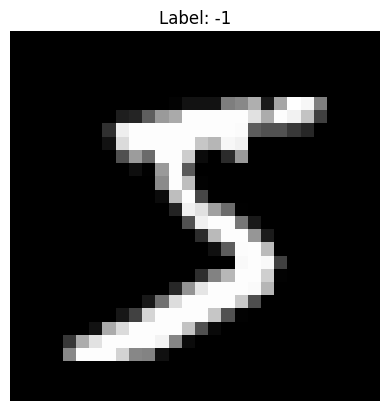

In [132]:

# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)
# Assuming you want to visualize the first image

# Index changed
indicator_labels = (labels-5)*2-1

image_index = 0
image_data = data_matrix[image_index]
selected_label = int(indicator_labels[image_index])
# Visualize the image using Matplotlib
# We transpose the image to make the number look upright.
plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off') # Turn off axis
plt.show()

In [133]:
def knn(training_points, training_labels, test_points, test_labels):
    m = training_points.shape[0]
    n = test_points.shape[0]
    
    print(f"m: {m}")
    print(f"n: {n}")

    # Calculates dot products
    training_dot_training = np.dot(training_points, np.transpose(training_points))
    training_dot_test = np.dot(training_points, np.transpose(test_points))
    test_dot_test = np.dot(test_points, np.transpose(test_points))
    
    # Formula from assignment text
    fst_part = np.outer(np.diag(training_dot_training), np.transpose(np.ones(n)))
    snd_part = 2 * training_dot_test
    trd_part = np.outer(np.transpose(np.ones(m)), np.transpose(np.diag(test_dot_test)))

    # All distances as m x n matrix (from assignment text)
    distances = np.transpose(fst_part - snd_part + trd_part)

    # Sorted indices
    indices = np.argsort(distances)

    # Count the majority vote for all K closest points     
    Y = list(map(lambda x, y: np.sign(np.cumsum((training_labels[x] == y)*2-1)), indices, test_labels))

    # m-vector of average error of K-nn
    return 1 - sum(Y) / n

    
    

In [134]:
m = 50

training_data = data_matrix[:m]
training_labels = indicator_labels[:m]

testing_data = data_matrix[m+1:]
testing_labels = indicator_labels[m+1:]

print(knn(training_data, training_labels, testing_data, testing_labels))


m: 50
n: 1826
[0.15553122 0.18346112 0.15334064 0.17141292 0.15881709 0.17907996
 0.18072289 0.18838992 0.20153341 0.20865279 0.2135816  0.23986857
 0.2475356  0.25027382 0.26286966 0.27491785 0.28148959 0.29025192
 0.31106243 0.30996714 0.31325301 0.32146769 0.33515882 0.34720701
 0.35706462 0.36911281 0.38773275 0.42661555 0.45345016 0.50273823
 0.55859803 0.59364732 0.63417306 0.65662651 0.69989047 0.7135816
 0.73713034 0.75739321 0.77765608 0.79518072 0.82146769 0.84008762
 0.87513691 0.8932092  0.92004381 0.92004381 0.92004381 0.92004381
 0.92004381 0.92004381]
